# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

## 1. Is the distribution of body temperatures normal?



This can be first investigated by using a graphical approach, namely by observing the Probability Density Function (PDF), which shows the likelihood of an interval of continuous values, as well as the Cumulative Distribution Function (CDF).

### Probability Density Function (PDF)

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
temperatures = df['temperature']

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
mean = np.mean(temperatures)
std = np.std(temperatures)
samples = np.random.normal(mean, std, size=100000)

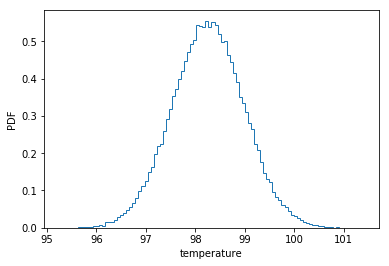

In [7]:
plt.hist(samples, normed=True, histtype='step', bins=100)
plt.xlabel('temperature')
plt.ylabel('PDF')
plt.show()


In [8]:
sns.set()

## CDF

In [9]:
x = np.sort(temperatures)
y = np.arange(1, len(x) +1) / len(x)
x_theor = np.sort(samples)
y_theor = np.arange(1, len(x_theor) +1) / len(x_theor)

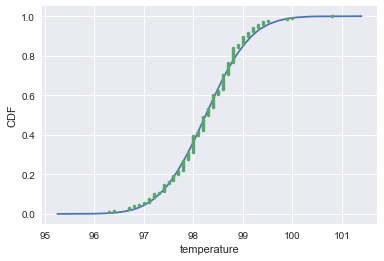

In [10]:
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker ='.', linestyle = 'none')
_ = plt.xlabel('temperature')
_ = plt.ylabel('CDF')
plt.show()

Looking at both the PDF and the CDF, the temperature distribution does appear to be quite normal.  However what does scipy give us?

Scipy has several built-in normality tests, such as one based on D’Agostino's K^2 Test and the Shapiro-Wilk Test.


### D’Agostino’s K^2 Test


In [11]:
import scipy.stats as stats

In [12]:
print (len(temperatures))

130


In [31]:
stat, p = stats.normaltest(temperatures)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
print('alpha : ' + str(alpha))


Statistics=2.704, p=0.259
alpha : 0.05


p is greater than alpha, so we fail to reject the null hypothesis.  The sample looks normal

### Shapiro–Wilk test

In [34]:
stat, p = stats.shapiro(temperatures)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
print('alpha : ' + str(alpha))

Statistics=0.987, p=0.233
alpha : 0.05


p is greater than alpha, so we fail to reject the null hypothesis.  The sample looks normal

## 2. Is the sample size large? Are the observations independent? 

In [14]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


Observations are certainly independent-- "In probability theory, two events are independent, statistically independent, or stochastically independent if the occurrence of one does not affect the probability of occurrence of the other" (https://en.wikipedia.org/wiki/Independence_(probability_theory))


In [15]:
len(temperatures)

130

The sample size is 130.  This is not an enormous sample, and larger sample sizes do significantly increase statistical accuracy.  In the past, some statisticians have noted as a guideline that n >= 30 is a sufficient sample size, and this is found in some statistics textbook, although this rule has undergone significant criticism (https://stats.stackexchange.com/questions/2541/what-references-should-be-cited-to-support-using-30-as-a-large-enough-sample-siz) In any case, for purposes of this analysis, the sample size for temperatures, while not particularly large, is likely large enough.

## 3. Is the true population mean really 98.6 degrees F? 

Bootstrapping

A visual bootstrapping strategy is to create an ECDF (empirical cumulative distribution function).

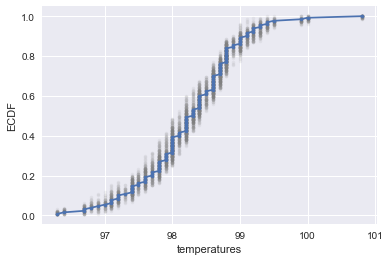

In [16]:
for i in range(50):
    tempsample = np.random.choice(temperatures, size=130)
    x = np.sort(tempsample)
    y = np.arange(1, len(x)+1) / len(x)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)
x = np.sort(temperatures)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.')
_ = plt.xlabel('temperatures')
_ = plt.ylabel('ECDF')
plt.show()

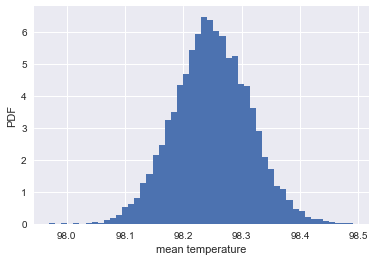

In [17]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

bs_replicates = draw_bs_reps(temperatures, np.mean, size=10000)

_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean temperature')
_ = plt.ylabel('PDF')
plt.show()



What is the 95th percentile of mean temperature from the bootstrapped data?

In [18]:
np.percentile(bs_replicates, [2.5, 97.5])

array([98.12384615, 98.37538462])

Significantly, the upper bound is less than the expected population mean of 98.6 degrees F.

#### Bootstrap hypothesis test:

In [29]:
translated_temp_mean = temperatures - np.mean(temperatures) + 98.6
bs_replicates = draw_bs_reps(translated_temp_mean, np.mean, 10000)
p = np.sum(bs_replicates <= np.mean(temperatures)) / 10000
print('p = ', p)

p =  0.0


Try frequentist testing:

In [19]:
mean = np.mean(temperatures)
std = np.std(temperatures)
n = len(temperatures)
print ("sample mean is : " + str(mean))
print ("sample standard deviation is : " + str(std))
print ("sample n is : " + str(n))

sample mean is : 98.24923076923075
sample standard deviation is : 0.730357778905038
sample n is : 130


The following is the formula for one sample t-test

t = (sample mean - population mean) / (standard deviation of data / √(n))

In [20]:
sqrtn = np.sqrt(n)
t = (mean - 98.6) / (std / sqrtn)
print (t)

-5.4759252020785585


This t-value indicates that the sample mean is less than the hypothesized mean.  The t-value and p-value can also be calculated with the scipy function below.

In [21]:
onesamplettestresults = stats.ttest_1samp(temperatures, 98.6)
print (onesamplettestresults)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


Because p < 0.05, the sample values and the population value are closely associated and we reject the null hypothesis.

In [22]:
estimatedstandarderror = std/sqrtn

In [24]:
z = (mean - 98.5) / estimatedstandarderror
print (z)

-3.9148061751703507


In [27]:
p_values = stats.norm.sf(abs(z))
print (p_values)

4.523843010475382e-05


The p-values for the z-test and t-test both reject the null hypothesis, but they are not the same.  This is because the t-test does not require the population variance, but the z-test does (and was estimated above using the sample variance).  It is generally considered best to use the t-test when one does not know the population variance. 

The mean of 98.6 degrees F is within the 95% confidence interval.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [46]:
sample10 = df.sample(10)
sample10 = sample10['temperature']
print (sample10)

48    97.9
41    98.4
11    96.7
92    98.8
53    98.6
50    98.9
88    98.7
20    98.3
24    97.8
31    97.6
Name: temperature, dtype: float64


In [47]:
smean = np.mean(sample10)
sstd = np.std(sample10)
sn = len(sample10)
print ("sample mean is : " + str(smean))
print ("sample standard deviation is : " + str(sstd))
print ("sample n is : " + str(sn))
ssqrtn = np.sqrt(sn)
st = (smean - 98.6) / (sstd / ssqrtn)
print ("sample t is : " + str(st))

sample mean is : 98.16999999999999
sample standard deviation is : 0.6450581369148056
sample n is : 10
sample t is : -2.107995103163878


In [48]:
sample10_onesamplettestresults = stats.ttest_1samp(sample10, 98.6)
print (onesamplettestresults)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


In [49]:
sestimatedstandarderror = sstd/ssqrtn
sz = (mean - 98.5) / sestimatedstandarderror
print (sz)
sp_values = stats.norm.sf(abs(sz))
print (sp_values)

-1.2293495592691743
0.10947038668910569


The p-value from the t-test is the same as it is in the previous example, but the p-value from the z-test is significantly higher.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

The 95% confidence internal is known as the "reference range" and values outside of it are considered to be abnormal.

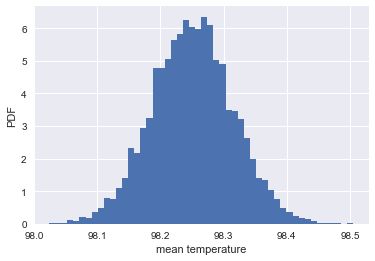

array([98.12461538, 98.37692308])

In [50]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

bs_replicates = draw_bs_reps(temperatures, np.mean, size=10000)

_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean temperature')
_ = plt.ylabel('PDF')

plt.show()

np.percentile(bs_replicates, [2.5, 97.5])

In [54]:
mean = np.mean(temperatures)
std = np.std(temperatures)
n = len(temperatures)
confint = stats.norm.interval(0.95, loc=mean, scale=std)
print (confint)

(96.81775582674821, 99.68070571171329)


The confidence interverval calculated from the sample differs from the bootstrapped confidence interval.

## 6.  Is there a significant difference between males and females in normal temperature? 


    What testing approach did you use and why?
    Write a story with your conclusion in the context of the original problem. 

In [55]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [60]:
female = df['gender'] == 'F'
male = df['gender'] == 'M'

dffemale = df[female]
dfmale = df[male]
dffemale.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0


In [68]:
maletemp = dfmale['temperature']
femaletemp = dffemale['temperature']

In [71]:
male_bs_replicates = draw_bs_reps(maletemp, np.mean, size=10000)
female_bs_replicates = draw_bs_reps(maletemp, np.mean, size=10000)

print (np.mean(male_bs_replicates))
print (np.mean(female_bs_replicates))
print (np.percentile(male_bs_replicates, [2.5, 97.5]))
print (np.percentile(female_bs_replicates, [2.5, 97.5]))

98.10307876923078
98.10647861538462
[97.93384615 98.27538462]
[97.94       98.27234615]


The above output shows that the the mean temperature for males and females are essentially the same, with males having a very slightly lower average temperature at 98.103 degrees, vs. 98.106 degrees for females.  

I chose the bootstrapping method because it seems a bit more accurate to use it than inferring population statistics from the sample, as the sample has only 130 values. 